# Titanic Binary Classification (ÌÉÄÏù¥ÌÉÄÎãâ ÏÉùÏ°¥Ïûê ÏòàÏ∏°)

> ÌÉÄÏù¥ÌÉÄÎãâ ÌÉëÏäπ ÏäπÍ∞ùÏùò Ï†ïÎ≥¥(data)Î•º Î∞îÌÉïÏúºÎ°ú Í∑∏Îì§Ïù¥ ÏÉùÏ°¥ÌñàÎäîÏßÄÎ•º ÏòàÏ∏°ÌïòÎäî Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†ú  
> Ï£ºÏöî ÌïµÏã¨ÏùÄ model, preprocessing and feature engineering

In [1]:
# library Î∂àÎü¨Ïò§Í∏∞
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Load

> Ï≤òÏùåÏóêÎäî train Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò® Îí§, Í∏∞Î≥∏ Ï†ïÎ≥¥ÏôÄ Í≤∞Ï∏°Ïπò Ïó¨Î∂Ä, Î†àÏù¥Î∏î Î∂ÑÌè¨ Îì±ÏùÑ ÌôïÏù∏Ìï®.  
> Í∞Å featureÎ•º ÌïòÎÇòÌïòÎÇò ÎúØÏñ¥Î≥¥Î©∞ Ïñ¥ÎñªÍ≤å Î≥ÄÌòïÌï† Ïàò ÏûàÏùÑÏßÄ Ï†ÑÎûµÏùÑ ÏÑ∏ÏõÄ.

Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò® ÌõÑ ÏÉÅÏúÑ ÌñâÏùÑ Ï∂úÎ†•Ìï¥ÏÑú Î≥ÄÏàò ÌôïÏù∏

In [2]:
#Load the dataset
data=pd.read_csv("data/train.csv",index_col="PassengerId")
y=data["Survived"]
X=data.drop(labels=["Survived"], axis=1)

In [ ]:
# ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉú ÏÇ¥Ìé¥Î≥¥Í∏∞
print('number of data inputs = ',len(X.index))
X.head()

number of data inputs =  891


Pclass                                               Name  \
PassengerId                                                              
1                 3                            Braund, Mr. Owen Harris   
2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3                 3                             Heikkinen, Miss. Laina   
4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5                 3                           Allen, Mr. William Henry   

                Sex   Age  SibSp  Parch            Ticket     Fare Cabin  \
PassengerId                                                                
1              male  22.0      1      0         A/5 21171   7.2500   NaN   
2            female  38.0      1      0          PC 17599  71.2833   C85   
3            female  26.0      0      0  STON/O2. 3101282   7.9250   NaN   
4            female  35.0      1      0            113803  53.1000  C123   
5              male  35.0      0      0            373450   8.0500   NaN   

            Embarked  
PassengerId           
1                  S  
2                  C  
3                  S  
4                  S  
5                  S

Î†àÏù¥Î∏îÏùò ÏÉÅÏúÑ Î™á Í∞ú Í∞íÎèÑ Ìï®Íªò ÌôïÏù∏

In [4]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

Ïó¨Í∏∞ÏÑú 1ÏùÄ ÏÉùÏ°¥, 0ÏùÄ ÏÇ¨ÎßùÏùÑ ÏùòÎØ∏Ìï®

Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÍ≥º Í≤∞Ï∏°Ïπò Í∞úÏàòÎ•º ÌôïÏù∏Ìï®

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


Í∞Å featureÎ•º ÌïòÎÇòÏî© Î≥¥Í≥† Ï†ÑÏ≤òÎ¶¨Î•º ÏßÑÌñâ

## Feature engineering
>- dataÎ•º modelÏóê ÎÑ£Í∏∞ Ï†ÑÏóê Í∞Å columnÎì§ÏùÑ Î∂ÑÏÑùÌïòÍ≥† Î≥ÄÌôòÌïòÎäî Í≥ºÏ†ï.  
>- ÌäπÌûà Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨, ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±, Ïä§ÏºÄÏùºÎßÅ Îì±Ïù¥ Ìè¨Ìï®Îê®.

### Pclass (Í∞ùÏã§ Îì±Í∏â)
>- ticket Îì±Í∏âÏùÑ ÏùòÎØ∏ÌïòÎäî column. 
>- Ïà´ÏûêÏ≤òÎüº Î≥¥Ïù¥ÏßÄÎßå Ïã§Ï†úÎ°úÎäî category Í∞úÎÖêÏù¥ Í∞ïÌï® ‚Üí One-hot encodingÏúºÎ°ú Î≥ÄÌôò.
>- PclassÎäî 1, 2, 3Ïùò Í∞íÏùÑ Í∞ÄÏßÄÎ©∞ Í∞ùÏã§ Îì±Í∏âÏùÑ ÎÇòÌÉÄÎÉÑ

In [6]:
X.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [7]:
oh= pd.get_dummies(X.Pclass,prefix="Pclass")
X = X.drop(labels='Pclass',axis=1).join(oh)

### Name
>- Name Ïª¨ÎüºÏùÄ ÏßÅÏ†ë ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏßÄÎßå, Í∑∏ ÏïàÏùò title Ï†ïÎ≥¥Îäî Ïú†Ïö©.  
>- Ïù¥Î¶ÑÏóêÏÑú ÏùòÎØ∏ ÏûàÎäî Ï†ïÎ≥¥Îäî Ìò∏Ïπ≠(title)Î°ú ÌåêÎã®ÌïòÏó¨ Ïù¥Î•º Ï∂îÏ∂úÌï®
>- Mr, Mrs, Miss Îì± Ìò∏Ïπ≠ÏùÑ Ï∂îÏ∂úÌï¥ÏÑú ÏÉàÎ°úÏö¥ featureÎ°ú ÏÇ¨Ïö©.

In [ ]:
X['Title'] = X.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
pd.crosstab(X.Title, X.Sex)

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

Ìù¨Í∑ÄÌïú titleÏùÄ RareÎ°ú Î¨∂Í≥†, ÎπÑÏä∑Ìïú Í≤ÉÎÅºÎ¶¨Îäî Ìï©Ïπ®

In [9]:
rare_titles = ['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady',
           'Major', 'Rev', 'Sir']

X.Title.replace(rare_titles, 'Rare', inplace = True)
X.Title.replace(['Mlle', 'Ms'], 'Miss', inplace = True)
X.Title.replace(['Mme'], 'Mrs', inplace = True)
pd.crosstab(X.Title, X.Sex)

Sex     female  male
Title               
Master       0    40
Miss       185     0
Mr           0   517
Mrs        126     0
Rare         3    20

<Axes: xlabel='Title', ylabel='count'>

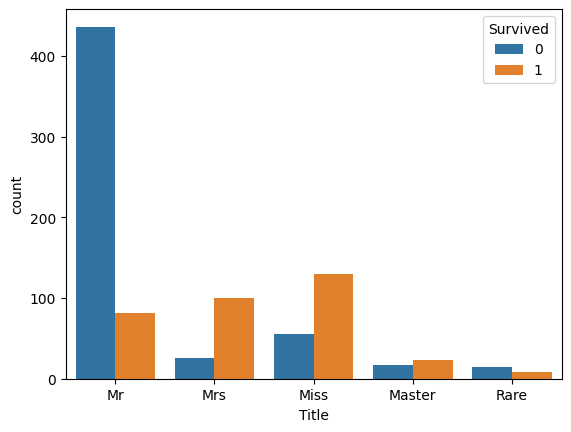

In [10]:
sns.countplot(x=X.Title,hue=data.Survived)

In [11]:
oh= pd.get_dummies(X.Title,prefix="Title")
X = X.drop(labels=['Name','Title'],axis=1).join(oh)
#X.Name = (X.Name.str.contains('Mr.')|X.Name.str.contains('Mrs.')).astype(np.uint8)

### Sex

>Îã® Îëê Í∞úÏùò Í∞íÎßå Ï°¥Ïû¨ÌïòÎØÄÎ°ú Ïù¥ÏßÑ Ïù∏ÏΩîÎî© Ï≤òÎ¶¨Ìï®.  
>* Ïó¨ÏÑ±ÏùÑ 1, ÎÇ®ÏÑ±ÏùÑ 0ÏúºÎ°ú Ï≤òÎ¶¨Ìï®.

In [12]:
X.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
X.Sex= (X.Sex=='female').astype(np.uint8)

<Axes: xlabel='Sex', ylabel='count'>

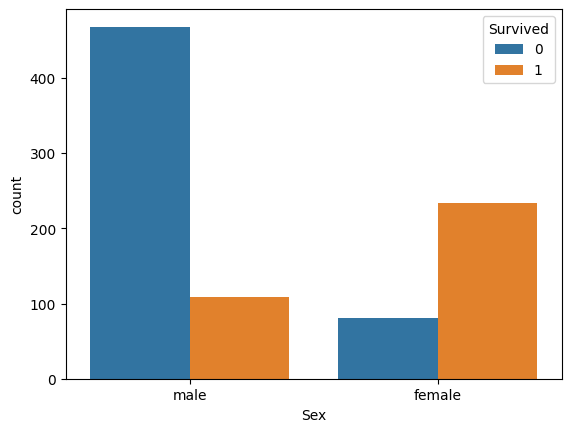

In [14]:
sns.countplot(data=data,x='Sex',hue="Survived")

### Age(ÎÇòÏù¥)

<Axes: xlabel='Age', ylabel='Density'>

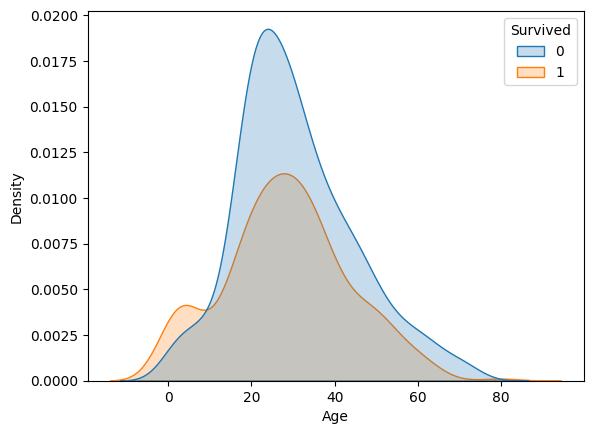

In [15]:
# AgeÏôÄ SurvivedÎ•º ÌïòÎÇòÏùò DataFrameÏúºÎ°ú Î¨∂Í∏∞
df_plot = pd.DataFrame({
    "Age": X["Age"],
    "Survived": y
})

# kdeplot Í∑∏Î¶¨Í∏∞ (fill=TrueÎäî shade=TrueÏùò ÏµúÏã† ÏòµÏÖò)
sns.kdeplot(data=df_plot, x="Age", hue="Survived", fill=True)

missing value(Í≤∞Ï∏°Ïπò)Ïùò ÎπÑÏú® ÌôïÏù∏Ìï¥Î≥¥Í∏∞
* Í∑∏ÎÉ• ÌñàÏùÑ Îïå Í≤∞Í≥ºÍ∞Ä Ïù¥ÏÉÅÌñàÏóàÏùå.

In [16]:
# Age Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò ÎπÑÏú®ÏùÑ ÌôïÏù∏Ìï®
ratio = np.round(X.Age.isna().sum()/len(X.index)*100, decimals=1)
print('Í≤∞Ï∏°Ïπò ÎπÑÏú® :', ratio,'%')

Í≤∞Ï∏°Ïπò ÎπÑÏú® : 19.9 %


Í≤∞Ï∏°ÏπòÍ∞Ä ÎßéÏïÑÏÑú ÎìúÎ°≠ÌïòÎ©¥ Ï†ïÎ≥¥ ÏÜêÏã§Ïù¥ ÌÅº.  
Ï†ÑÏ≤¥ ÌèâÍ∑†ÏúºÎ°ú Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö∞Í≥†, Ïù¥ÌõÑ Ïä§ÏºÄÏùºÎßÅÏùÑ Ï†ÅÏö©Ìï®.

In [17]:
X.Age[X.Age.isna()] = X.Age.mean()

/tmp/ipykernel_3085817/3694875884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Age[X.Age.isna()] = X.Age.mean()


featureÏùò stastics ÌôïÏù∏Ìï¥ÏÑú ÌëúÏ§ÄÌôî ÏßÑÌñâ ÏòàÏ†ï

In [18]:
X.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

ÌèâÍ∑†ÏùÑ ÎπºÍ≥† ÌëúÏ§ÄÌé∏Ï∞®Î°ú ÎÇòÎàÑÎäî Î∞©ÏãùÏúºÎ°ú Ïä§ÏºÄÏùºÎßÅÌïòÎäî Î∞©ÏãùÏù∏ standardization(ÌëúÏ§ÄÌôî) ÏßÑÌñâ

In [19]:
X.Age = (X.Age-X.Age.mean())/X.Age.std()

### SibSp (ÌòïÏ†úÏûêÎß§/Î∞∞Ïö∞Ïûê Ïàò)

<Axes: xlabel='SibSp', ylabel='count'>

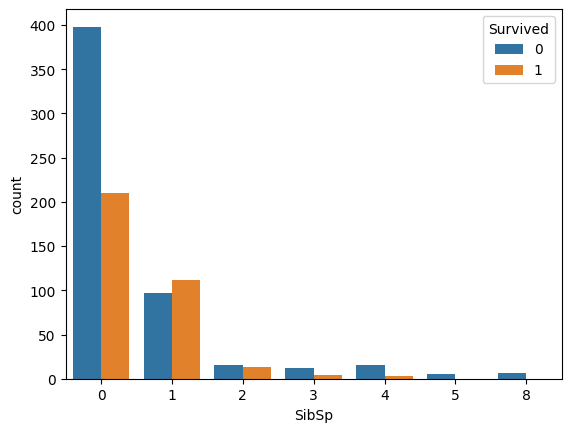

In [20]:
sns.countplot(data=data,x='SibSp',hue="Survived")

In [21]:
X.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

SibSpÎäî 7Í∞úÏùò ÏÑúÎ°ú Îã§Î•∏ Í∞íÏùÑ Í∞ÄÏ†∏ÏÑú one-hot encodingÏùÑ ÏßÅÏ†ë ÌïòÍ∏∞Ïóî Ï¢ãÏßÄ ÏïäÏïÑÎ≥¥ÏûÑ. 


In [22]:
ratio = np.round((X.SibSp>1).sum()/len(X.index)*100,decimals=1)
print("SibSp columnÏóêÏÑú 2 Ïù¥ÏÉÅÏùò ÎπÑÏú® = ",ratio,"%")

SibSp columnÏóêÏÑú 2 Ïù¥ÏÉÅÏùò ÎπÑÏú® =  8.3 %


ÎåÄÎ∂ÄÎ∂ÑÏù¥ 0~1Ïù¥Í≥†, 2 Ïù¥ÏÉÅÏùÄ Ï†ÅÏùÄ ÎπÑÏú®(8.3%)Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Í∞íÏùÑ 2 Ïù¥ÏÉÅÏùÄ ÌïòÎÇòÎ°ú Î¨∂Í≥† one-hot encodingÏùÑ ÏßÑÌñâ.

In [23]:
X.SibSp.clip(upper=2,inplace=True)

one-hot encoding Í≤∞Í≥º

In [24]:
oh= pd.get_dummies(X.SibSp,prefix="SibSp")
X = X.drop(labels='SibSp',axis=1).join(oh)

In [25]:
X['SibSp_0']

PassengerId
1      False
2      False
3       True
4      False
5       True
       ...  
887     True
888     True
889    False
890     True
891     True
Name: SibSp_0, Length: 891, dtype: bool

### Parch (Î∂ÄÎ™®/ÏûêÎÖÄ Ïàò)

<Axes: xlabel='Parch', ylabel='count'>

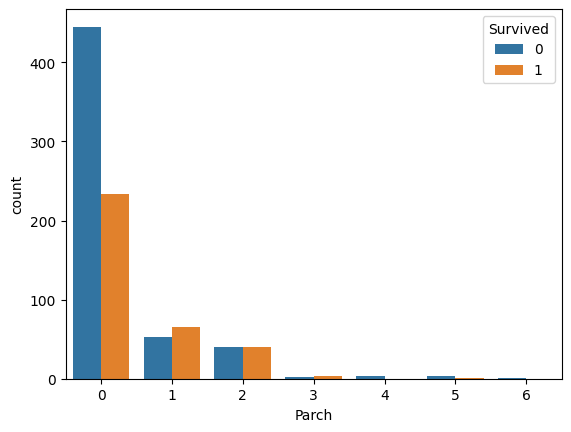

In [26]:
sns.countplot(data=data,x='Parch',hue="Survived")

In [27]:
X.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

SibSpÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú 2 Ïù¥ÏÉÅÏùÑ ÌïòÎÇòÏùò categoryÎ°ú Ï≤òÎ¶¨ÌïòÍ≥† one-hot encoding.


In [28]:
X.Parch.clip(upper=2,inplace=True)
oh= pd.get_dummies(X.Parch,prefix="Parch")
X = X.drop(labels='Parch',axis=1).join(oh)

### FamilySize (Í∞ÄÏ°± ÌÅ¨Í∏∞ Î≥ÄÏàò ÏÉùÏÑ±)
Derived Variable(ÌååÏÉù Î≥ÄÏàò)
>ÌòïÏ†úÏûêÎß§/Î∞∞Ïö∞Ïûê Ïàò(SibSp)ÏôÄ Î∂ÄÎ™®/ÏûêÎÖÄ Ïàò(Parch)Î•º Ìï©ÏπòÍ≥† ÏûêÍ∏∞ ÏûêÏã†ÏùÑ ÎçîÌï¥ÏÑú `FamilySize`ÎùºÎäî ÌååÏÉù Î≥ÄÏàòÎ•º ÎßåÎì¶  
>
>Í∞ÄÏ°±Í≥º Ìï®Íªò ÌÉëÏäπÌñàÎäîÏßÄ Ïó¨Î∂ÄÍ∞Ä ÏÉùÏ°¥Ïóê ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏúºÎØÄÎ°ú Ï∂îÍ∞Ä

In [29]:
# FamilySize ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
# SibSpÏôÄ ParchÍ∞Ä Ïù¥ÎØ∏ Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Í∞ÅÍ∞ÅÏùò Í∞íÏùÑ Í≥±Ìï¥ÏÑú Îã§Ïãú Ìï©ÏÇ∞Ìï¥Ï§å
X["FamilySize"] = (
    X.get("SibSp_1", 0) * 1 + X.get("SibSp_2", 0) * 2 +
    X.get("Parch_1", 0) * 1 + X.get("Parch_2", 0) * 2 + 1
)
X["FamilySize"] = X["FamilySize"].astype(float)  # ÎÇòÏ§ëÏóê Tensor Î≥ÄÌôò Îì±ÏùÑ Í≥†Î†§ÌïòÏó¨ float ÌòïÎ≥ÄÌôò
X["FamilySize"].head()

PassengerId
1    2.0
2    2.0
3    1.0
4    2.0
5    1.0
Name: FamilySize, dtype: float64

### Ticket (Ìã∞Ïºì Î≤àÌò∏)

>ÏùòÎØ∏ ÏûàÎäî Ï†ïÎ≥¥ Ï∂îÏ∂úÏù¥ Ïñ¥Î†µÍ≥† Ï§ëÎ≥µÎèÑ ÎßéÏïÑÏÑú Í≥ºÍ∞êÌûà Ï†úÍ±∞!

In [30]:
X.drop(labels='Ticket',axis=1,inplace=True)

### Fare (ÏöîÍ∏à)

/tmp/ipykernel_3085817/441118664.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data,x='Fare', shade=True,hue="Survived")


<Axes: xlabel='Fare', ylabel='Density'>

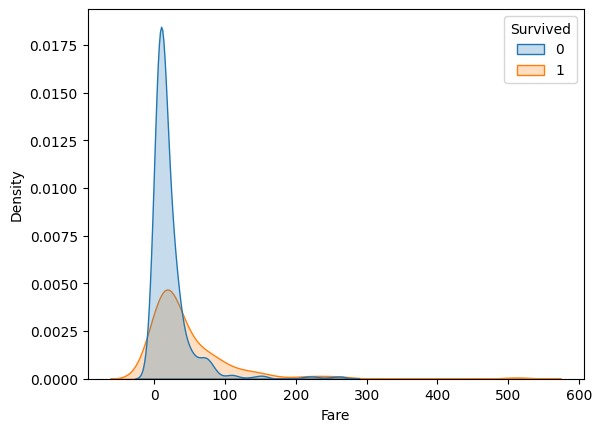

In [31]:
sns.kdeplot(data=data,x='Fare', shade=True,hue="Survived")

Î∂ÑÌè¨Í∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ï≥ê ÏûàÏñ¥ ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î°ú Ï†ïÍ∑úÌôî(or ÌëúÏ§ÄÌôî)Í∞Ä ÌïÑÏöîÌï¥ Î≥¥ÏûÑ.

In [32]:
X.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Standardization ÏßÑÌñâ
* ÌèâÍ∑†ÏùÑ ÎπºÍ≥† ÌëúÏ§ÄÌé∏Ï∞®Î°ú ÎÇòÎàÑÎäî Î∞©ÏãùÏúºÎ°ú Ïä§ÏºÄÏùºÎßÅ. 

In [33]:
X.Fare = (X.Fare-X.Fare.mean())/X.Fare.std()

### Cabin (Í∞ùÏã§ Î≤àÌò∏)

Í≤∞Ï∏°ÏπòÍ∞Ä ÎßéÏßÄÎßå, Ï°¥Ïû¨ Ïó¨Î∂ÄÎÇò Ïïû Î¨∏Ïûê Îì±ÏùÄ Ï†ïÎ≥¥Í∞Ä Îê† Ïàò ÏûàÏñ¥ÏÑú Ï†ÑÏ≤òÎ¶¨ ÌõÑ Ïú†ÏùòÎØ∏Ìïú Í∞íÎßå ÎÇ®ÍπÄ.
* Í≤∞Ï∏°ÏπòÎ•º 'U'Î°ú ÎåÄÏ≤¥Ìï¥ÏÑú Î≥¥Ïûê

In [34]:
X.Cabin[X.Cabin.isna()]='U'

/tmp/ipykernel_3085817/1686841740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Cabin[X.Cabin.isna()]='U'


In [35]:
X.Cabin=X.Cabin.str[0] #select the first letter
X.Cabin.value_counts() #print the statistics

Cabin
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

<Axes: xlabel='Cabin', ylabel='count'>

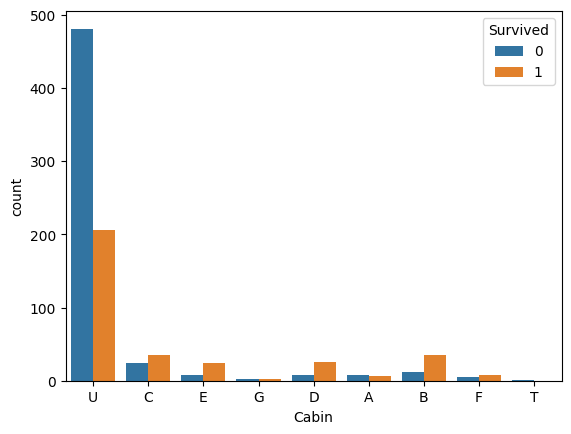

In [36]:
sns.countplot(data=data,x=X.Cabin,hue="Survived")

Í∞Å CabinÏóê ÎåÄÌï¥ Chi2 ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ïÏùÑ ÏßÑÌñâ
* CabinÏù¥ÎùºÎäî Î≥ÄÏàòÍ∞Ä ÏÉùÏ°¥Î•†(y)Í≥º ÎèÖÎ¶ΩÏ†ÅÏù∏ÏßÄ(Î¨¥Í¥ÄÌïúÏßÄ)Î•º ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Í≤ÄÏ¶ù
* Ï¶â, ÏòàÏ∏°Ïóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî Î≥ÄÏàòÏù∏ÏßÄ ÏïÑÎãåÏßÄ Î≥¥Í∏∞ ÏúÑÌï¥ Í≤ÄÏ¶ù

In [37]:
from scipy.stats import chi2_contingency
for letter in X.Cabin.unique():
    cab_binary = X.Cabin==letter
    contigency = pd.crosstab(cab_binary, y) 
    c, p, dof, expected = chi2_contingency(contigency)
    p = np.round(p*100,decimals=3)
    print('Chi2 test for the independence of Cabin = ',letter,'. p-value =',p,"%")
    

Chi2 test for the independence of Cabin =  U . p-value = 0.0 %
Chi2 test for the independence of Cabin =  C . p-value = 0.102 %
Chi2 test for the independence of Cabin =  E . p-value = 0.003 %
Chi2 test for the independence of Cabin =  G . p-value = 100.0 %
Chi2 test for the independence of Cabin =  D . p-value = 0.002 %
Chi2 test for the independence of Cabin =  A . p-value = 69.098 %
Chi2 test for the independence of Cabin =  B . p-value = 0.0 %
Chi2 test for the independence of Cabin =  F . p-value = 14.928 %
Chi2 test for the independence of Cabin =  T . p-value = 100.0 %


CabinÏùò statisticÍ≥º plotÏùÑ ÌÜµÌï¥ UÍ∞Ä Í≤∞Ï∏°ÏπòÎ•º ÎÇòÌÉÄÎÇ¥Îäî Í∞ÄÏû• Ï§ëÏöîÌïú Ï†ïÎ≥¥ÏûÑÏùÑ Ïïå Ïàò ÏûàÏùå

one-encodingÏùÑ ÏßÑÌñâÌïòÎêò p-valueÍ∞Ä ÎÇÆÏùÄ G, A, F, TÎäî Ï†úÍ±∞Ìï¥ÏÑú ÏßÑÌñâ

In [38]:
oh = pd.get_dummies(X.Cabin,prefix="Cabin")
categories_to_drop = ['Cabin_'+i for i in ['G','A','F','T']]
oh = oh.drop(labels = categories_to_drop, axis = 1) 

X = X.drop(labels='Cabin',axis=1).join(oh)

### Embarked (ÌÉëÏäπ Ìï≠Íµ¨)

<Axes: xlabel='Embarked', ylabel='count'>

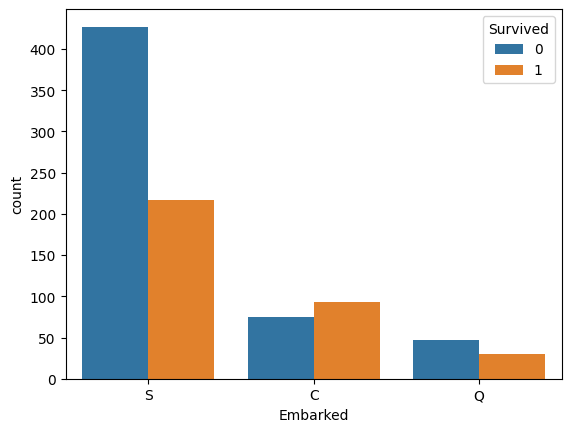

In [39]:
sns.countplot(data=data,x='Embarked',hue="Survived")

In [40]:
X.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Í≤∞Ï∏°ÏπòÎäî ÏµúÎπàÍ∞íÏúºÎ°ú Ï±ÑÏö∞Í≥† one-hot encoding.

In [41]:
oh= pd.get_dummies(X.Embarked,prefix="Embarked")
X = X.drop(labels='Embarked',axis=1).join(oh)

## feature engineering Summary

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           891 non-null    uint8  
 1   Age           891 non-null    float64
 2   Fare          891 non-null    float64
 3   Pclass_1      891 non-null    bool   
 4   Pclass_2      891 non-null    bool   
 5   Pclass_3      891 non-null    bool   
 6   Title_Master  891 non-null    bool   
 7   Title_Miss    891 non-null    bool   
 8   Title_Mr      891 non-null    bool   
 9   Title_Mrs     891 non-null    bool   
 10  Title_Rare    891 non-null    bool   
 11  SibSp_0       891 non-null    bool   
 12  SibSp_1       891 non-null    bool   
 13  SibSp_2       891 non-null    bool   
 14  Parch_0       891 non-null    bool   
 15  Parch_1       891 non-null    bool   
 16  Parch_2       891 non-null    bool   
 17  FamilySize    891 non-null    float64
 18  Cabin_B       891 non-null    bool 

In [43]:
X.corr()

Sex       Age      Fare  Pclass_1  Pclass_2  Pclass_3  \
Sex           1.000000 -0.084153  0.182333  0.098013  0.064746 -0.137143   
Age          -0.084153  1.000000  0.091566  0.319916  0.006589 -0.281004   
Fare          0.182333  0.091566  1.000000  0.591711 -0.118557 -0.413333   
Pclass_1      0.098013  0.319916  0.591711  1.000000 -0.288585 -0.626738   
Pclass_2      0.064746  0.006589 -0.118557 -0.288585  1.000000 -0.565210   
Pclass_3     -0.137143 -0.281004 -0.413333 -0.626738 -0.565210  1.000000   
Title_Master -0.159934 -0.377265  0.010908 -0.084700  0.009903  0.064918   
Title_Miss    0.693916 -0.249169  0.119518  0.020348 -0.021903  0.000293   
Title_Mr     -0.867334  0.185900 -0.183766 -0.097288 -0.088569  0.155907   
Title_Mrs     0.550146  0.164533  0.107259  0.093608  0.119193 -0.177658   
Title_Rare   -0.075638  0.189872  0.016275  0.155640  0.056827 -0.180349   
SibSp_0      -0.203203  0.148409 -0.192190 -0.058470 -0.033099  0.077316   
SibSp_1       0.179339  0.014570  0.133121  0.125673  0.077469 -0.171329   
SibSp_2       0.067438 -0.272739  0.119825 -0.094326 -0.063112  0.132636   
Parch_0      -0.247523  0.261583 -0.237717 -0.008373 -0.039091  0.039029   
Parch_1       0.127636 -0.147908  0.114650  0.018496  0.062425 -0.066741   
Parch_2       0.201880 -0.199046  0.202590 -0.008743 -0.014539  0.019365   
FamilySize    0.253826 -0.286577  0.258672  0.001863  0.009191 -0.009086   
Cabin_B       0.109689  0.091394  0.386297  0.417160 -0.120386 -0.261450   
Cabin_C       0.058649  0.113149  0.364318  0.470749 -0.135851 -0.295036   
Cabin_D       0.079248  0.132319  0.098878  0.291218 -0.041325 -0.217282   
Cabin_E       0.047003  0.117211  0.053717  0.242675 -0.038864 -0.177461   
Cabin_U      -0.140391 -0.233123 -0.482075 -0.788773  0.172413  0.539291   
Embarked_C    0.082853  0.032024  0.269335  0.296423 -0.125416 -0.153329   
Embarked_Q    0.074115 -0.013855 -0.117216 -0.155342 -0.127301  0.237449   
Embarked_S   -0.125722 -0.027121 -0.166603 -0.170379  0.192061 -0.009511   

              Title_Master  Title_Miss  Title_Mr  Title_Mrs  ...   Parch_2  \
Sex              -0.159934    0.693916 -0.867334   0.550146  ...  0.201880   
Age              -0.377265   -0.249169  0.185900   0.164533  ... -0.199046   
Fare              0.010908    0.119518 -0.183766   0.107259  ...  0.202590   
Pclass_1         -0.084700    0.020348 -0.097288   0.093608  ... -0.008743   
Pclass_2          0.009903   -0.021903 -0.088569   0.119193  ... -0.014539   
Pclass_3          0.064918    0.000293  0.155907  -0.177658  ...  0.019365   
Title_Master      1.000000   -0.110981 -0.254903  -0.087987  ...  0.206088   
Title_Miss       -0.110981    1.000000 -0.601857  -0.207749  ...  0.145912   
Title_Mr         -0.254903   -0.601857  1.000000  -0.477160  ... -0.266175   
Title_Mrs        -0.087987   -0.207749 -0.477160   1.000000  ...  0.110266   
Title_Rare       -0.035291   -0.083327 -0.191387  -0.066063  ... -0.056235   
SibSp_0          -0.247924   -0.001428  0.294116  -0.276603  ... -0.248598   
SibSp_1           0.071853   -0.087472 -0.194670   0.345444  ...  0.057638   
SibSp_2           0.307924    0.136718 -0.197271  -0.063782  ...  0.330886   
Parch_0          -0.374095   -0.128289  0.381733  -0.195434  ... -0.616354   
Parch_1           0.283067    0.028567 -0.237967   0.145511  ... -0.134976   
Parch_2           0.206088    0.145912 -0.266175   0.110266  ...  1.000000   
FamilySize        0.382476    0.124744 -0.394009   0.206390  ...  0.703047   
Cabin_B          -0.026914    0.064880 -0.114673   0.062731  ...  0.048622   
Cabin_C          -0.035937    0.008343 -0.047873   0.073270  ...  0.054246   
Cabin_D          -0.042519    0.016822 -0.049952   0.073907  ... -0.029240   
Cabin_E          -0.012717    0.020161 -0.031384   0.042837  ... -0.047135   
Cabin_U           0.027841   -0.043749  0.137319  -0.123817  ... -0.019466   
Embarked_C       -0.035225    0.036204 -0.072567   0.067872  ... -0.027077   
Embarked_Q      

## Feature scoring

> Í∞Å featureÍ∞Ä SurvivedÏóê ÏñºÎßàÎÇò ÏòÅÌñ•ÏùÑ Ï£ºÎäîÏßÄ Mutal Information ScoreÎ°ú Ï∏°Ï†ïÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï®.

<Axes: xlabel='MI Scores', ylabel='None'>

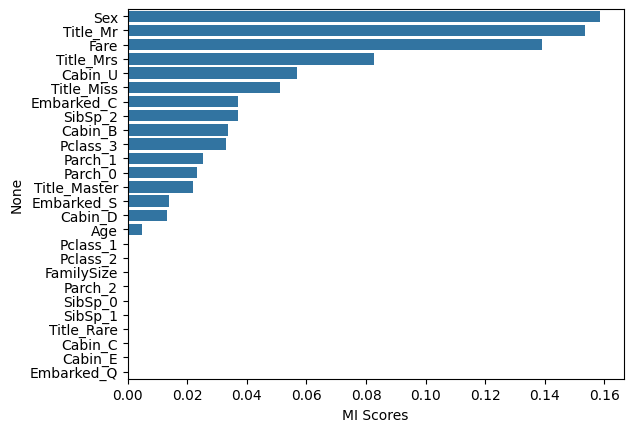

In [44]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    discrete_features = [X.columns.get_loc(column_name) for column_name in X.dtypes[X.dtypes=='uint8'].index] 
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

    
  
mi_scores = make_mi_scores(X, y)
X = X[mi_scores.index]  
sns.barplot(x=mi_scores, y=mi_scores.index)


## Splitting
TrainÍ≥º validation Î∂ÑÎ•ò

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val= train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=1,shuffle=True)

# Metric : Accuracy, F1-score, ROC-AUC

`Accuracy` Ïù¥Ïô∏ÏóêÎèÑ `F1-score`ÏôÄ `ROC-AUC`Î•º Í≥ÑÏÇ∞Ìï¥ Î™®Îç∏Ïùò precision¬∑recall Í∑†ÌòïÍ≥º Ï†ÑÏ≤¥ Î∂ÑÎ•ò ÏÑ±Îä•ÏùÑ ÌôïÏù∏.


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(name, y_true, y_pred, y_proba=None):
    print(f"üìå {name} Í≤∞Í≥º:")
    print("  - Accuracy :", accuracy_score(y_true, y_pred))
    print("  - Precision:", precision_score(y_true, y_pred))
    print("  - Recall   :", recall_score(y_true, y_pred))
    print("  - F1 Score :", f1_score(y_true, y_pred))
    if y_proba is not None:
        print("  - ROC AUC  :", roc_auc_score(y_true, y_proba))
    print("-" * 40)


### Models
Í∏∞Î≥∏ Î™®Îç∏: `Logistic Regression`, `Decision Tree`

Í∞úÏÑ† Î™®Îç∏: `Random Forest`, `XGBoost`

Îî•Îü¨Îãù: `Simple MLP model` 

In [47]:
# train/val split Ïù¥ÌõÑÏùò Ï†ÑÏ≤¥ featureÎ•º ÏÇ¨Ïö©
# featureÎ•º selectÌï¥ÏÑú ÏÇ¨Ïö©Ìï¥ÎèÑ Î¨¥Î∞©ÌïòÎÇò feature selection Í≥ºÏ†ïÏùÑ Ï∂îÍ∞ÄÎ°ú ÎÑ£Ïñ¥Ïïº Ìï® (MIÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ìï¥ÎèÑ Îê®)
all_features = X.columns.tolist()

Logistic Regression, Decision Tree, Random Forest, XGBoost

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='error', random_state=0)
}

for name, model in models.items():
    model.fit(X_train[all_features], y_train)
    y_pred = model.predict(X_val[all_features])

    # ÌôïÎ•† Í∞íÏù¥ ÏûàÏùÑ Í≤ΩÏö∞ ROC-AUCÎèÑ ÌèâÍ∞Ä
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_val[all_features])[:, 1]
    else:
        y_proba = None

    evaluate_model(name, y_val, y_pred, y_proba)


/home/icl/anaconda3/envs/ML/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


üìå Logistic Regression Í≤∞Í≥º:
  - Accuracy : 0.7988826815642458
  - Precision: 0.7761194029850746
  - Recall   : 0.7123287671232876
  - F1 Score : 0.7428571428571429
  - ROC AUC  : 0.8252132333936417
----------------------------------------
üìå Decision Tree Í≤∞Í≥º:
  - Accuracy : 0.7262569832402235
  - Precision: 0.6764705882352942
  - Recall   : 0.6301369863013698
  - F1 Score : 0.652482269503546
  - ROC AUC  : 0.7104548979064358
----------------------------------------
üìå Random Forest Í≤∞Í≥º:
  - Accuracy : 0.776536312849162
  - Precision: 0.7894736842105263
  - Recall   : 0.6164383561643836
  - F1 Score : 0.6923076923076923
  - ROC AUC  : 0.8233393641767899
----------------------------------------
üìå XGBoost Í≤∞Í≥º:
  - Accuracy : 0.770949720670391
  - Precision: 0.7857142857142857
  - Recall   : 0.6027397260273972
  - F1 Score : 0.6821705426356588
  - ROC AUC  : 0.8409795812871542
----------------------------------------


### Îî•Îü¨Îãù Î™®Îç∏
Simple MLP ÏÇ¨Ïö©

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Tensor Î≥ÄÌôò
X_tr = torch.tensor(X_train[all_features].astype(float).values, dtype=torch.float32)
y_tr = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_vl = torch.tensor(X_val[all_features].astype(float).values, dtype=torch.float32)
y_vl = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

train_ds = TensorDataset(X_tr, y_tr)
val_ds   = TensorDataset(X_vl, y_vl)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=64)

class SimpleMLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleMLP(len(all_features)).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(100):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        loss = criterion(model(xb), yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Í≤ÄÏ¶ù
model.eval()
y_pred_list = []
y_proba_list = []
with torch.no_grad():
    for xb, _ in val_loader:
        xb = xb.to(device)
        out = model(xb).cpu()
        y_proba_list.append(out)
        y_pred_list.append((out > 0.5).float())

y_pred_mlp = torch.cat(y_pred_list).numpy().flatten()
y_proba_mlp = torch.cat(y_proba_list).numpy().flatten()

evaluate_model("MLP (PyTorch, all features)", y_val.values, y_pred_mlp, y_proba_mlp)


üìå MLP (PyTorch, all features) Í≤∞Í≥º:
  - Accuracy : 0.7262569832402235
  - Precision: 0.7608695652173914
  - Recall   : 0.4794520547945205
  - F1 Score : 0.5882352941176471
  - ROC AUC  : 0.8097053502196951
----------------------------------------


#### ÌïúÎààÏóê ÎπÑÍµêÌïòÍ∏∞!

In [50]:
# MLP
evaluate_model("MLP (PyTorch, all features)", y_val.values, y_pred_mlp, y_proba_mlp)
# Logistic Regression, Decision Tree, Random Forest, XGBoost
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='error', random_state=0)
}

for name, model in models.items():
    model.fit(X_train[all_features], y_train)
    y_pred = model.predict(X_val[all_features])

    # ÌôïÎ•† Í∞íÏù¥ ÏûàÏùÑ Í≤ΩÏö∞ ROC-AUCÎèÑ ÌèâÍ∞Ä
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_val[all_features])[:, 1]
    else:
        y_proba = None

    evaluate_model(name, y_val, y_pred, y_proba)

üìå MLP (PyTorch, all features) Í≤∞Í≥º:
  - Accuracy : 0.7262569832402235
  - Precision: 0.7608695652173914
  - Recall   : 0.4794520547945205
  - F1 Score : 0.5882352941176471
  - ROC AUC  : 0.8097053502196951
----------------------------------------
üìå Logistic Regression Í≤∞Í≥º:
  - Accuracy : 0.7988826815642458
  - Precision: 0.7761194029850746
  - Recall   : 0.7123287671232876
  - F1 Score : 0.7428571428571429
  - ROC AUC  : 0.8252132333936417
----------------------------------------
üìå Decision Tree Í≤∞Í≥º:
  - Accuracy : 0.7262569832402235
  - Precision: 0.6764705882352942
  - Recall   : 0.6301369863013698
  - F1 Score : 0.652482269503546
  - ROC AUC  : 0.7104548979064358
----------------------------------------
üìå Random Forest Í≤∞Í≥º:
  - Accuracy : 0.776536312849162


/home/icl/anaconda3/envs/ML/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


  - Precision: 0.7894736842105263
  - Recall   : 0.6164383561643836
  - F1 Score : 0.6923076923076923
  - ROC AUC  : 0.8233393641767899
----------------------------------------
üìå XGBoost Í≤∞Í≥º:
  - Accuracy : 0.770949720670391
  - Precision: 0.7857142857142857
  - Recall   : 0.6027397260273972
  - F1 Score : 0.6821705426356588
  - ROC AUC  : 0.8409795812871542
----------------------------------------
